# Routing con LangGraph

## Definición (nivel MIT/Stanford, aplicada)
Routing clasifica el input y envía cada caso a una estrategia especializada para evitar respuestas promedio.

## Cuándo usarla
Úsala cuando detectas perfiles claramente distintos que demandan estilos distintos.

## Cuándo NO usarla
No la uses si tus categorías se solapan demasiado y el router sería ruido.

## Diagrama Conceptual

```mermaid
graph TD
A[Contexto] --> B[Router]
B --> C[Estrategia Intelectual]
B --> D[Estrategia Creativa]
B --> E[Estrategia Aventura]
C --> F[Final]
D --> F
E --> F
```

In [1]:
# Setup de clase
from __future__ import annotations

import importlib.util
import inspect
import json
import sys
from pathlib import Path
from IPython.display import Image, Markdown, display


def find_repo_root(start: Path) -> Path:
    for p in [start, *start.parents]:
        if (p / "pyproject.toml").exists():
            return p
    raise RuntimeError("No se encontro raiz del repo")


def load_module(path: Path, module_name: str):
    spec = importlib.util.spec_from_file_location(module_name, path)
    module = importlib.util.module_from_spec(spec)
    if spec is None or spec.loader is None:
        raise RuntimeError(f"No se pudo cargar modulo: {path}")
    sys.modules[module_name] = module
    spec.loader.exec_module(module)
    return module

ROOT = find_repo_root(Path.cwd())
print(f"Repo root: {ROOT}")

Repo root: /Users/carlosdaniel/Documents/Projects/labor_projects/Henry/2026/01-introduction_ai_engineering/ai_engineering_henry


In [2]:
script_path = ROOT / '04_langchain_langgraph/05_routing/Notebooks/01_routing_langgraph.py'
module = load_module(script_path, 'nb_routing')
run_fn = module.run_routing
print('Script:', script_path)
print('Función:', run_fn.__name__)

Script: /Users/carlosdaniel/Documents/Projects/labor_projects/Henry/2026/01-introduction_ai_engineering/ai_engineering_henry/04_langchain_langgraph/05_routing/Notebooks/01_routing_langgraph.py
Función: run_routing


## Código de la arquitectura (visible en notebook)

In [3]:
print(inspect.getsource(run_fn)[:5000])

def run_routing(profile: dict | None = None, verbose: bool = True) -> dict:
    root = find_repo_root(Path.cwd())
    load_dotenv(root / ".env")
    api_key = os.getenv("OPENAI_API_KEY")
    if not api_key:
        raise RuntimeError("OPENAI_API_KEY no esta definida en .env")

    model = os.getenv("OPENAI_MODEL", "gpt-4o-mini")
    llm = ChatOpenAI(model=model, temperature=0.5, api_key=api_key)

    build_context_packet = load_context_builder(root)
    if profile is None:
        profile = {
            "tipo_persona": "neurocientifica especializada en sueno",
            "gustos": ["documentales BBC", "yoga aereo", "cafes silenciosos"],
            "estilo": "curiosa, profunda, humor sutil",
            "contexto": "match tras mencionar un paper",
        }
    context_packet = build_context_packet(profile=profile, architecture="routing")

    def route_profile(state: RoutingState) -> dict:
        prompt = ChatPromptTemplate.from_messages(
            [
                ("system", "E

## Ejemplo 1: caso base del curso

In [4]:
result_1 = run_fn(verbose=False)
print('Modelo:', result_1['__model'])
print('Context hash:', result_1['__context_hash'])

Modelo: gpt-4o-mini
Context hash: e97ab3913453


In [5]:
print('Salida final ejemplo 1:')
print(json.dumps(result_1['final'], ensure_ascii=False, indent=2))

Salida final ejemplo 1:
{
  "opener": "Hola, me encantaría saber qué piensas sobre la relación entre el sueño y la neurociencia. He estado leyendo algunos estudios fascinantes al respecto, especialmente uno que menciona cómo los ciclos de sueño afectan la memoria. ¿Tienes algún documental de la BBC sobre este tema en mente?",
  "follow_up": "Además, me parece interesante cómo el yoga aéreo puede influir en nuestro bienestar mental y, por ende, en la calidad del sueño. ¿Has notado alguna diferencia en tu descanso desde que lo practicas?",
  "style_used": "intelectual"
}


## Grafo real LangGraph (comportamiento)

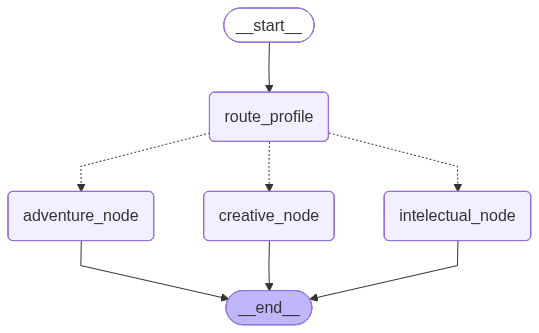

In [6]:
agent = result_1['__agent']
try:
    display(Image(agent.get_graph().draw_mermaid_png()))
except Exception as exc:
    print('No se pudo renderizar PNG en este entorno:', exc)
    display(Markdown('```mermaid\n' + result_1['__graph_mermaid'] + '\n```'))

## Ejemplo 2: asistente latino experto en enamorar (coqueteo creativo y respetuoso)

In [7]:
profile_coqueteo = {
  "tipo_persona": "asistente latino experto en enamorar con elegancia",
  "gustos": [
    "salsa romantica",
    "cafes bohemios",
    "poesia urbana",
    "paseos nocturnos"
  ],
  "estilo": "carismatico, coqueto, respetuoso, humor picante sutil",
  "contexto": "quiere iniciar una conversacion de coqueteo sin caer en frases prefabricadas"
}
result_2 = run_fn(profile=profile_coqueteo, verbose=False)
print('Context hash coqueteo:', result_2['__context_hash'])

Context hash coqueteo: 3131a6ebca4a


In [8]:
print('Salida final ejemplo coqueteo:')
print(json.dumps(result_2['final'], ensure_ascii=False, indent=2))

Salida final ejemplo coqueteo:
{
  "opener": "¿Sabías que la salsa romántica tiene el poder de hacer que las estrellas brillen un poco más? Quizás deberíamos encontrar un café bohemio donde el ritmo nos lleve a un baile improvisado.",
  "follow_up": "Y mientras paseamos bajo las luces de la ciudad, podríamos compartir nuestros versos favoritos de poesía urbana. ¿Te animas a crear una historia juntos?",
  "style_used": "creativo"
}


## Errores típicos en producción
- Elegir esta arquitectura por moda y no por necesidad.
- No definir métricas de calidad/costo/latencia antes de escalar.
- No versionar contexto ni criterios de evaluación.
- Falta de observabilidad para diagnosticar degradaciones.

## Lectura crítica del resultado
- Evalúa si el flujo realmente mejoró calidad o solo añadió complejidad.
- Compara latencia/costo vs beneficio de control arquitectónico.
- Decide si esta arquitectura es mínima suficiente para tu caso real.